In [19]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Fitting polynomials


In [30]:
# Generate a fake dataset with Gaussian noise
x=np.linspace(-5.0,7.0)
y=x*np.sin(0.25*x)+0.1*np.random.normal(0.0,1.0,len(x))
sy=0.1*np.ones_like(y)

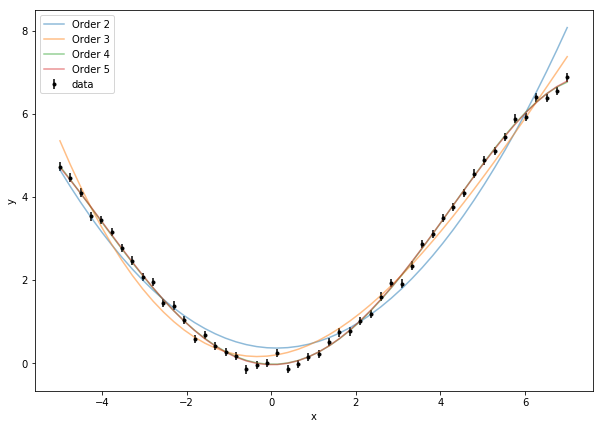

In [32]:
# Plot data
plt.figure(figsize=(10,7))
plt.errorbar(x,y,sy,fmt='k.',label='data')

# Fit data with polynomials of different orders (and plot)
for i in np.arange(2,6):
    # Fit 
    p=np.polyfit(x,y,i)
    plt.plot(x,np.polyval(p,x),alpha=0.5,label='Order %d'%i)

# Plot labels/legend    
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [ ]:
plt.